# Seed-based FC


**Resources**

[Nilearn 9.4.6. Producing single subject maps of seed-to-voxel correlation](https://nilearn.github.io/auto_examples/03_connectivity/plot_seed_to_voxel_correlation.html#sphx-glr-auto-examples-03-connectivity-plot-seed-to-voxel-correlation-py)

[Nilearn: 9.5.4. Default Mode Network extraction of AHDH dataset](https://nilearn.github.io/auto_examples/04_glm_first_level/plot_adhd_dmn.html)

:::{note}
HC coordinates from Sherman (2015): <br>
'Analyses focused on a priori defined region of the anterior hippocampus (MNI coordinates: x = -21, y = -9, z = -15) because of its importance to retrieval of relational memory (Giovanello et al., 2009) and sensitivity to prior sleep physiology (Mander et al., 2013a).'
:::

In [78]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob

import warnings
warnings.filterwarnings('ignore')

from nilearn import plotting, image, input_data
from nilearn.glm.first_level import make_first_level_design_matrix, FirstLevelModel
from nilearn.plotting import plot_design_matrix, plot_contrast_matrix

tr = 1.5  
n_scans = 164 * 3
frame_times = np.arange(n_scans) * tr  
hc_coords = [(-21, -9, -15)]
runs = ['1', '2', '3']

In [3]:
func_files = sorted(glob.glob('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-*/func/sub-*_task-MemMatch[1-3]_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'))
func_files[:5]

['/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch1_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch2_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch3_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30008/func/sub-30008_task-MemMatch1_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30008/func/sub-30008_task-MemMatch2_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz']

In [4]:
conf_files = sorted(glob.glob('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-*/func/sub-*_task-MemMatch[1-3]_run-01_desc-confounds_regressors.tsv'))
conf_files[:5]

['/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch1_run-01_desc-confounds_regressors.tsv',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch2_run-01_desc-confounds_regressors.tsv',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30004/func/sub-30004_task-MemMatch3_run-01_desc-confounds_regressors.tsv',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30008/func/sub-30008_task-MemMatch1_run-01_desc-confounds_regressors.tsv',
 '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-30008/func/sub-30008_task-MemMatch2_run-01_desc-confounds_regressors.tsv']

In [5]:
subjects = np.unique([ func_file.split('sub-')[1][:5] for func_file in func_files])
np.savetxt('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/subjects.txt', subjects, fmt = '%s')
subjects[:5]

array(['30004', '30008', '30009', '30012', '30015'], dtype='<U5')

## First level GLM

In [6]:
hrf_model = 'spm + derivative'
selected_confounds = ['a_comp_cor_00', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z', 'motion_outlier_00']

In [206]:
for subject in subjects:
    
    for run in runs:
    
        try:
            confounds_ = pd.read_csv('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-MemMatch%s_run-01_desc-confounds_regressors.tsv' % (subject, subject, run), 
                                            sep = '\t')
            confounds_['motion_outlier_00'] = np.where(confounds_['framewise_displacement'] > 0.20, 1, 0)
            confounds_.to_csv('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-MemMatch%s_run-01_desc-confounds_regressors.tsv' % (subject, subject, run), sep='\t', index=False)

        except Exception as e:
            print(subject)
            print(e)

40601
[Errno 2] File b'/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40601/func/sub-40601_task-MemMatch3_run-01_desc-confounds_regressors.tsv' does not exist: b'/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40601/func/sub-40601_task-MemMatch3_run-01_desc-confounds_regressors.tsv'
40768
[Errno 2] File b'/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40768/func/sub-40768_task-MemMatch2_run-01_desc-confounds_regressors.tsv' does not exist: b'/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40768/func/sub-40768_task-MemMatch2_run-01_desc-confounds_regressors.tsv'
40779
[Errno 2] File b'/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40779/func/sub-40779_task-MemMatch3_run-01_desc-confounds_regressors.tsv' does not exist: b'/Volumes/psybrain/ADM/derivatives/fmriprep/sub-40779/func/sub-40779_task-MemMatch3_run-01_desc-confounds_regressors.tsv'
40968
No columns to parse from file


# Seed masker

In [159]:
seed_masker = input_data.NiftiSpheresMasker(
    hc_coords, radius=8,
    mask_img='/usr/local/fsl/data/standard/MNI152_T1_1mm_brain_mask.nii.gz',
    detrend=True, 
    standardize=True,
    low_pass=0.08, high_pass=0.008, 
    t_r=tr,
    memory='nilearn_cache', memory_level=1, verbose=0)

brain_masker = input_data.NiftiMasker(
    mask_img='/usr/local/fsl/data/standard/MNI152_T1_1mm_brain_mask.nii.gz',
    smoothing_fwhm=6,
    detrend=True, 
    standardize=True,
    low_pass=0.08, high_pass=0.008, 
    t_r=tr,
    memory='nilearn_cache', memory_level=1, verbose=0)


In [227]:
# for i, subject in enumerate(subjects):
    
#     print(i, subject)

Just running a couple subjects to give an example here. Output saved to psyimage.

# Pipeline

In [241]:
dsn = pd.DataFrame(frame_times, columns = ['frame_times'])
i = 0

for subject in subjects:
    
    try:
        print('subject: %s' % subject)

        events_concat = pd.DataFrame()
        confounds_concat = pd.DataFrame()
        func_files = []
        func_img = []
        func_img_cue = []

        for run in runs:

            # concatenate 3 runs event files
            events = pd.read_csv('/Volumes/psybrain/ADM/sub-%s/func/sub-%s_task-MemMatch%s_run-01_fc_events.tsv' % (subject, subject, run), sep='\t')                 
            events['onset'] = events['onset'] + (1.5 * 164 * (int(run)-1))
            events_concat = events_concat.append(events).reset_index(drop=True)

            # concatenate 3 runs confounds files
            confounds = pd.read_csv('/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-MemMatch%s_run-01_desc-confounds_regressors.tsv' % (subject, subject, run), 
                                    sep = '\t')[selected_confounds]
            confounds_concat = confounds_concat.append(confounds).reset_index(drop=True)

            # get all 3 func file names
            func_file = '/Volumes/psybrain/ADM/derivatives/fmriprep/sub-%s/func/sub-%s_task-MemMatch%s_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz' % (subject, subject, run)
            func_files = func_files + [func_file]

        # concatenate 3 runs of func images
        func_img = image.concat_imgs(func_files)
        print('concatenated functional image dimensions: ', func_img.shape)

        # drop non-cue period
        condition_mask = events_concat['trial_type'] == 'cue'
        events_condition = events_concat[condition_mask]

        dsn['cue'] = np.nan
        for onset in events_condition['onset']:
            for time in frame_times:
                if time >= onset and time < onset + 6:
                    dsn['cue'][dsn['frame_times'] == time] = 1

        cue_idx = np.where(dsn['cue'] == 1)[0]
        func_img_cue = image.index_img(func_img, cue_idx)
        func_img_cue.to_filename(
            '/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/sub-%s_task-MemMatch_cue_bold.nii.gz' %
        (subject))
        print('cue functional image dimensions: ', func_img_cue.shape)

        if i == 0:

            sns.heatmap(dsn.set_index('frame_times'))
            plt.show()
            plt.close()

            for img in image.iter_img(image.index_img(func_img_cue, slice(0,3))):
                display = plotting.plot_stat_map(img, title='slices of sub-%s cue func image' % subject)
                display.close()

        # seed-based hippocampal FC


        print('extract time series from hc roi')
        seed_time_series = seed_masker.fit_transform(func_img_cue, confounds=confounds_concat.iloc[cue_idx])

        print('extract time series from brain')
        brain_time_series = brain_masker.fit_transform(func_img_cue, confounds=confounds_concat.iloc[cue_idx])

        if i == 0:
            print("Seed time series shape: (%s, %s)" % seed_time_series.shape)
            print("Brain time series shape: (%s, %s)" % brain_time_series.shape)

        plt.plot(seed_time_series)
        plt.title('sub-%s, Seed FC (Hippocampus)' % subject)
        plt.xlabel('Scan number')
        plt.ylabel('Normalized signal')
        plt.tight_layout()
        plt.show()
        plt.close()

        seed_to_voxel_correlations = (np.dot(brain_time_series.T, seed_time_series) /
                              seed_time_series.shape[0])

        seed_to_voxel_correlations_img = brain_masker.inverse_transform(seed_to_voxel_correlations.T)

        seed_to_voxel_correlations_img.to_filename(
            '/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/sub-%s_task-MemMatch_cue_seed-based-hc_correlation_zstat.nii.gz' %
        (subject))

        display = plotting.plot_stat_map(seed_to_voxel_correlations_img,
                                         threshold=0.5, vmax=1,
                                         cut_coords=hc_coords[0],
                                         title="sub-%s Seed-to-voxel correlation (HC seed)" % subject
                                         )

    #     display.add_markers(marker_coords=hc_coords, marker_color='g',
    #                         marker_size=200)

        plt.show()
        display.savefig('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/sub-%s_task-MemMatch_cue_seed-based-hc_correlation_zstat.png' %
                       (subject))

        i += 1
    
    except Exception as e:
        print(e)

subject: 30004


KeyboardInterrupt: 

In [ ]:
drop_subs = []
fd_stats = pd.DataFrame()
tr_perc = .2

for file in sorted(conf_files):
    
    subject = file.split('sub-')[1][:5]
    run = file.split('MemMatch')[1][0:1]
    
    try:
    
        conf_ = pd.read_csv(file, sep='\t')
        
        fd_mean = conf_['framewise_displacement'].mean()
        fd_perc = (conf_['framewise_displacement'] > 0.50).sum() / len(conf_['framewise_displacement'])
        fd_stats = fd_stats.append({'subject': subject,
                                    'run': run,
                                    'fd_mean': fd_mean,
                                   'fd_perc': fd_perc}, ignore_index=True)
        
        if ((fd_mean > 0.50) or (fd_perc > tr_perc)):
            drop_subs.append([subject, run, 'fd_mean= %.2f' % fd_mean, 'fd_perc = %.2f' % fd_perc])
            
    except Exception as e:
        print(subject, e)
        drop_subs.append([subject, run, e])
    

## Motion QC

In [ ]:
drop_subs_ = [x[0] for x in drop_subs]
drop_subs_

In [ ]:
fd_stats['fd_mean'].plot(kind='hist')

In [ ]:
fd_stats['fd_perc'].plot(kind='hist')

In [ ]:
cor_files = glob.glob('/Volumes/schnyer/Megan/adm_mem-fc/analysis/seed-based_fc/sub-*_task-MemMatch_cue_seed-based-hc_correlation_zstat.nii.gz')
print(len(cor_files))

cor_files = [file for file in cor_files if file.split('sub-')[1][:5] not in drop_subs_]
print(len(cor_files))
ya_files = [file for file in cor_files if 'sub-3' in file]
print('ya ', len(ya_files))
oa_files = [file for file in cor_files if 'sub-4' in file]
print('oa ', len(oa_files))

# dsn_mat2 = pd.DataFrame([1] * len(cor_files), columns = ['intercept'])
dsn_mat2 = pd.DataFrame([1] * len(ya_files) + [-1] * len(oa_files), columns=['age group'])

^ With dsn mat for intercept, result is brain on fire

In [ ]:
ya_files[:2]

In [ ]:
oa_files[:2]

In [ ]:
from nilearn.glm.second_level import SecondLevelModel

second_level_model = SecondLevelModel(smoothing_fwhm=8.0).fit(
    cor_files, design_matrix=dsn_mat2)


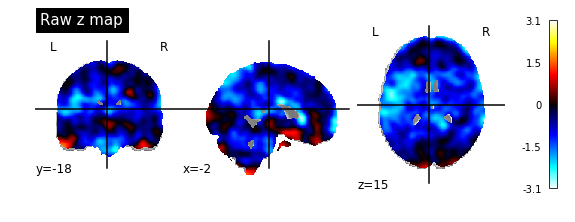

In [236]:
z_map = second_level_model.compute_contrast(second_level_contrast=[1], output_type='z_score')

from nilearn import plotting
display = plotting.plot_stat_map(z_map, title='Raw z map')

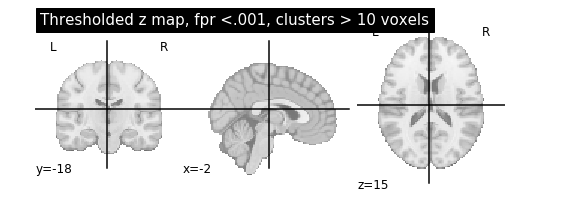

In [237]:
from nilearn.glm import threshold_stats_img
thresholded_map1, threshold1 = threshold_stats_img(
    z_map,
    alpha=.001,
    height_control='fpr',
    cluster_threshold=10,
    two_sided=True,
)
plotting.plot_stat_map(
    thresholded_map1, cut_coords=display.cut_coords, threshold=threshold1,
    title='Thresholded z map, fpr <.001, clusters > 10 voxels')

The FDR=.05 threshold is inf


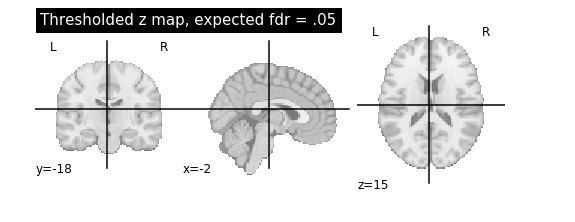

In [238]:
thresholded_map2, threshold2 = threshold_stats_img(
    z_map, alpha=.05, height_control='fdr')
print('The FDR=.05 threshold is %.3g' % threshold2)


plotting.plot_stat_map(thresholded_map2, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fdr = .05',
                       threshold=threshold2)

The p<.05 Bonferroni-corrected threshold is 5.56


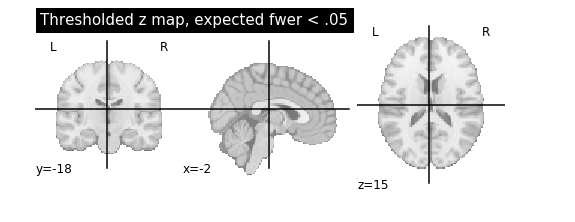

In [239]:
thresholded_map3, threshold3 = threshold_stats_img(
    z_map, alpha=.05, height_control='bonferroni')
print('The p<.05 Bonferroni-corrected threshold is %.3g' % threshold3)

plotting.plot_stat_map(thresholded_map3, cut_coords=display.cut_coords,
                       title='Thresholded z map, expected fwer < .05',
                       threshold=threshold3)